In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import cv2

# For Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator


2023-01-04 00:13:32.022877: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-04 00:13:33.593565: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/danannisar/miniconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-04 00:13:33.593633: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-04 00:13:33.880218: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has a

In [2]:
daisy_dir='./train/daisy' 
rose_dir='./train/rose' 
sunflower_dir='./train/sunflower'
tulip_dir='./train/tulip' 
dandelion_dir = './train/dandelion'

In [2]:
train_dir = './train'
test_dir = './test'

In [3]:
datagen = ImageDataGenerator(rescale=1/255.) # pre-processor
#datatrain = DirectoryIterator(train_dir, datagen) # load trainset dari folder train/
#datatest = DirectoryIterator(test_dir, datagen) # load testset dari folder test/

datatrain = datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle = True)

datatest = datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='categorical',
                                                shuffle = True)

Found 3762 images belonging to 5 classes.
Found 555 images belonging to 5 classes.


In [4]:
for image_batch, labels_batch in datatrain:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32, 5)


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
banyak batch: 118
apa itu imgs <class 'numpy.ndarray'>
dimensi imgs dengan batch: (32, 150, 150, 3)
dimensi gambar: (150, 150, 3)
contoh gambar (hanya channel Red)
[[0.8705883  0.92549026 0.81568635 ... 1.         0.9960785  1.        ]
 [0.8078432  0.80392164 0.7372549  ... 1.         1.         1.        ]
 [0.74509805 0.7137255  0.6901961  ... 1.         0.9960785  1.        ]
 ...
 [0.17254902 0.08235294 0.20000002 ... 0.4156863  0.40784317 0.5176471 ]
 [0.13333334 0.12941177 0.10588236 ... 0.44705886 0.30980393 0.54901963]
 [0.1764706  0.09411766 0.04705883 ... 0.43137258 0.21176472 0.54901963]]
contoh label
[0. 0. 0. 0. 1.]
contoh gambar visualnya


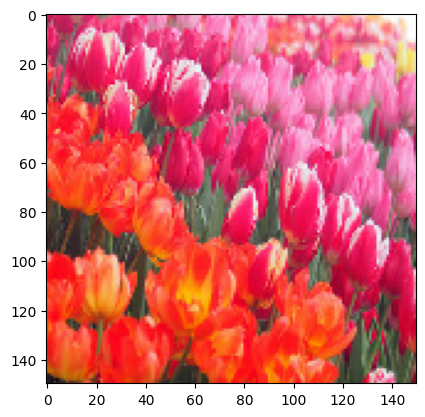

In [5]:
print(datatrain.class_indices) # menampilkan kelas-kelas pada dataset
print("banyak batch:", len(datatrain)) # menampilkan banyak batch

for imgs, labels in datatrain: # datatrain bukan array, hanya bisa diakses melalui perulangan
    print("apa itu imgs", type(imgs)) # numpy array 4D
    print("dimensi imgs dengan batch:", imgs.shape)  # (n-batch, panjang, lebar, channel)
    print("dimensi gambar:", imgs[0].shape) # ukuran tiap gambar
    print("contoh gambar (hanya channel Red)") # nilai ada antara 0 sampai 1
    print(imgs[0,:,:,0])
    print("contoh label") 
    print(labels[0]) # sudah "one-hot". Bukan tertulis kelas "3" tapi [0, 0, 0, 1, 0]

    print("contoh gambar visualnya")
    plt.imshow( imgs[0] )
    break

In [6]:
# train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(150, 150),
#     batch_size=32,
# )

# val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# val_generator = val_datagen.flow_from_directory(
#     test_dir,
#     target_size=(150, 150),
#     batch_size=32,
# )

NameError: name 'preprocess_input' is not defined

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.applications.xception import Xception, preprocess_input



In [8]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)
base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(5)(vectors)

model = keras.Model(inputs, outputs)

2023-01-04 01:03:35.488231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-04 01:03:35.490057: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/danannisar/miniconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-04 01:03:35.492200: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/danannisar/miniconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-04 01:03:35.492505: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.s

In [9]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [10]:
history = model.fit(
    datatrain,
    epochs=2,
    validation_data=datatest
)

Epoch 1/2
118/118 [==============================] - 214s 2s/step - loss: 0.7647 - accuracy: 0.7608 - val_loss: 0.6071 - val_accuracy: 0.8090
Epoch 2/2
118/118 [==============================] - ETA: 0s - loss: 0.4586 - accuracy: 0.8530

KeyboardInterrupt: 

In [11]:
model = Sequential([
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 16, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(5, activation='softmax')
])

2022-12-18 02:16:56.524828: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-18 02:16:56.525188: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/danannisar/miniconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-12-18 02:16:56.525366: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/danannisar/miniconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-12-18 02:16:56.525549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.s

In [12]:
model.compile(loss='categorical_crossentropy',
     optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.01),
     metrics=['accuracy'])

In [13]:
history = model.fit(datatrain, batch_size=16, epochs=10, validation_data=datatest)

Epoch 1/10
118/118 [==============================] - ETA: 0s - loss: 1.4658 - accuracy: 0.3612

KeyboardInterrupt: 

In [4]:
batch_size = 20
img_height = 100
img_width = 100

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3762 files belonging to 5 classes.
Using 3010 files for training.


In [17]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3762 files belonging to 5 classes.
Using 752 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [8]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 100, 100, 3)
(20,)


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99996084


In [12]:
num_classes = 5
model = models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
151/151 [==============================] - 55s 351ms/step - loss: 1.2797 - accuracy: 0.4439 - val_loss: 1.0651 - val_accuracy: 0.5465
Epoch 2/5
151/151 [==============================] - 55s 364ms/step - loss: 1.0094 - accuracy: 0.5890 - val_loss: 0.9683 - val_accuracy: 0.6077
Epoch 3/5
126/151 [========================>.....] - ETA: 7s - loss: 0.9038 - accuracy: 0.6398

KeyboardInterrupt: 

In [28]:
X = [] 
y_label = [] 
imgsize = 150 
def training_data(label,data_dir):
    print ("resizing：", data_dir) 
    for img in os.listdir(data_dir):
        path = os.path.join(data_dir,img) 
        img = cv2.imread(path,cv2.IMREAD_COLOR) 
        img = cv2.resize(img,(imgsize,imgsize)) 
        X.append(np.array(img)) 
        y_label.append(str(label))

training_data('daisy',daisy_dir) 
training_data('rose',rose_dir)
training_data('sunflower',sunflower_dir)
training_data('tulip',tulip_dir) 

resizing： ./train/daisy
resizing： ./train/rose
resizing： ./train/sunflower
resizing： ./train/tulip


In [32]:
from sklearn.preprocessing import LabelEncoder # 导入标签编码工具
from tensorflow.keras.utils import to_categorical # 导入One-hot编码工具
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_label) # 标签编码
y = to_categorical(y,5) # 将标签转换为One-hot编码
X = np.array(X) # 将X从列表转换为张量数组

In [35]:
X = X/255 
from sklearn.model_selection import train_test_split # 导入拆分工具
X_train, X_test, y_train, y_test = train_test_split(X, y, #拆分数据集
                             test_size=0.2,random_state=1)

: 

: 

In [ ]:
from tensorflow.keras import layers # 导入所有层 行1
from tensorflow.keras import models # 导入所有模型 行2
cnn = models.Sequential() # 贯序模型 行3
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', # 输入卷积层 行4
                        input_shape=(150, 150, 3))) 
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行5
cnn.add(layers.Conv2D(64, (3, 3), activation='relu')) # 卷积层 行6
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行7
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积层 行8
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行9
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积层 行10
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行11
cnn.add(layers.Flatten()) # 展平层 行12
cnn.add(layers.Dense(512, activation='relu')) # 全连接层 行13
cnn.add(layers.Dense(4, activation='softmax')) # 分类输出层 行14
cnn.compile(loss='categorical_crossentropy', # 损失函数 行15
            optimizer='RMSprop', # 优化器
            metrics=['acc']) # 评估指标

In [3]:
model = models.Sequential()

#Lets build a model with 2 Hidden Layers
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[150, 150, 3]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(5,activation="softmax"))

2022-12-18 01:00:02.383369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-18 01:00:02.383772: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-18 01:00:02.383941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-18 01:00:02.384057: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-18 01:00:02.384164: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [4]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 300)               20250300  
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 5)                 505       
                                                                 
Total params: 20,280,905
Trainable params: 20,280,905
Non-trainable params: 0
_________________________________________________________________


Found 3762 images belonging to 5 classes.


Found 555 images belonging to 5 classes.


In [26]:
train_generator

In [9]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/home/danannisar/miniconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/danannisar/miniconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/danannisar/miniconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/danannisar/miniconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/danannisar/miniconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_14287/172339970.py", line 1, in <cell line: 1>
      history = model.fit(
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/keras/losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/keras/losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/home/danannisar/miniconda3/lib/python3.9/site-packages/keras/backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [20,5] and labels shape [100]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_526]

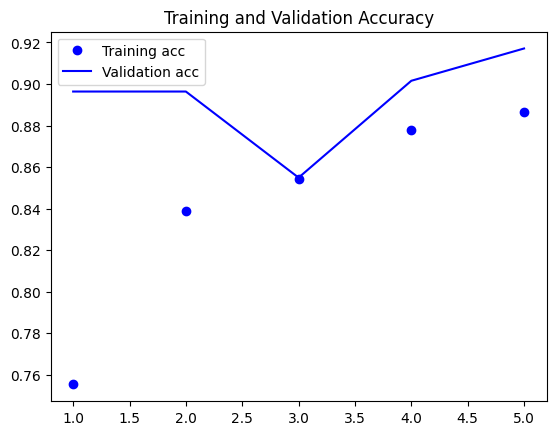

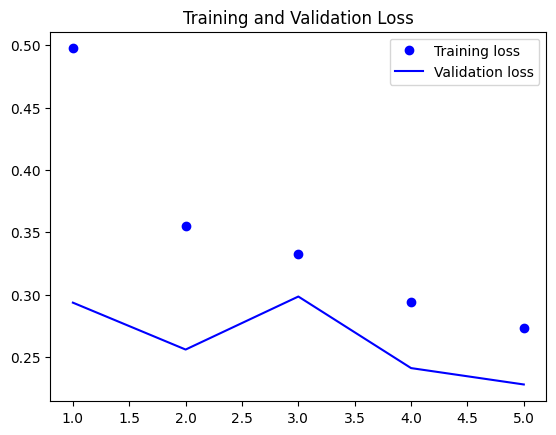

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()